In [80]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime,timedelta

In [107]:
df1 = pd.read_csv('/Users/niharpatel/Desktop/Untitled Folder/SampleData4.csv')

df1

In [108]:
df1.rename(columns = {'Unnamed: 0' : 'Index'}, inplace = True)

In [109]:
df1

,Index,open,close,high,low,date
0,0,1342.100000,1345.085221,1348.659736,1338.525485,2020-01-02 09:00:00
1,1,1345.085221,1348.165442,1349.693272,1343.557391,2020-01-02 09:05:00
2,2,1348.165442,1348.964998,1358.769402,1338.361038,2020-01-02 09:10:00
3,3,1348.964998,1351.860000,1359.948187,1340.876811,2020-01-02 09:15:00
4,4,1351.860000,1351.072686,1354.970295,1347.962392,2020-01-02 09:20:00
...,...,...,...,...,...,...
43173,67,202.108174,200.319846,202.176470,200.251551,2022-04-20 14:35:00
43174,68,200.319846,204.116677,205.527602,198.908921,2022-04-20 14:40:00
43175,69,204.116677,203.767022,204.903897,202.979802,2022-04-20 14:45:00
43176,70,203.767022,205.382824,206.704079,202.445767,2022-04-20 14:50:00


In [110]:
df2 = pd.read_csv('/Users/niharpatel/Desktop/Untitled Folder/SampleData4GT.csv')

In [111]:
df2

,Unnamed: 0,start,end,pattern
0,0,2020-01-02 11:40:00,2020-01-02 12:55:00,Double Bottom
1,1,2020-01-06 10:50:00,2020-01-06 12:20:00,Double Top
2,2,2020-01-07 11:10:00,2020-01-07 12:50:00,Head and shoulders
3,3,2020-01-09 13:25:00,2020-01-09 14:40:00,Double Bottom
4,4,2020-01-10 10:55:00,2020-01-10 12:30:00,Double Top
...,...,...,...,...
190,190,2022-03-31 10:40:00,2022-03-31 12:50:00,Head and shoulders
191,191,2022-04-08 12:45:00,2022-04-08 14:30:00,Head and shoulders
192,192,2022-04-12 12:35:00,2022-04-12 14:00:00,Double Bottom
193,193,2022-04-15 11:50:00,2022-04-15 13:30:00,Double Top


In [112]:
df1['date'] = pd.to_datetime(df1['date'])



In [113]:
df2['start'] = pd.to_datetime(df2['start'])
df2['end'] = pd.to_datetime(df2['end'])

In [114]:
def date_timeStamp(x):
    timestamp=[]
    for i in range(len(x)):
        timestamp.append(datetime.timestamp(x['date'][i]))
    return timestamp

x = date_timeStamp(df1)

In [115]:
df1['ts'] = x

In [116]:
df1

,Index,open,close,high,low,date,ts
0,0,1342.100000,1345.085221,1348.659736,1338.525485,2020-01-02 09:00:00,1.577936e+09
1,1,1345.085221,1348.165442,1349.693272,1343.557391,2020-01-02 09:05:00,1.577936e+09
2,2,1348.165442,1348.964998,1358.769402,1338.361038,2020-01-02 09:10:00,1.577936e+09
3,3,1348.964998,1351.860000,1359.948187,1340.876811,2020-01-02 09:15:00,1.577937e+09
4,4,1351.860000,1351.072686,1354.970295,1347.962392,2020-01-02 09:20:00,1.577937e+09
...,...,...,...,...,...,...,...
43173,67,202.108174,200.319846,202.176470,200.251551,2022-04-20 14:35:00,1.650446e+09
43174,68,200.319846,204.116677,205.527602,198.908921,2022-04-20 14:40:00,1.650446e+09
43175,69,204.116677,203.767022,204.903897,202.979802,2022-04-20 14:45:00,1.650446e+09
43176,70,203.767022,205.382824,206.704079,202.445767,2022-04-20 14:50:00,1.650446e+09


In [117]:

def date_timeStamp(x):
    timestamp1=[]
    timestamp2 =[]
    for i in range(len(x)):
        timestamp1.append(datetime.timestamp(x['start'][i]))
        timestamp2.append(datetime.timestamp(x['end'][i]))
        
    return timestamp1,timestamp2

ts1,ts2 = date_timeStamp(df2)

In [118]:
for i in ts1 :
    i = int(i)
   
    
for j in ts2:
    j = int(j)

df2['ts_start'] = ts1
df2['ts_end'] = ts2

In [119]:
df2['ts_start'] = df2['ts_start'].astype('int')
df2['ts_end'] = df2['ts_end'].astype('int')

In [120]:
df1.index = df1['ts']

In [121]:
start = df2['ts_start'][19]
end = df2['ts_end'][19]
df2['pattern'][19]

'Head and shoulders'

In [122]:
noti = df1.loc[start:end,['open','close','low','high']]

In [123]:
noti

,open,close,low,high
ts,,,,
1.583128e+09,918.662803,919.248295,916.287278,921.623819
1.583129e+09,919.248295,928.462529,915.651453,932.059371
1.583129e+09,928.462529,936.381365,921.050995,943.792899
1.583129e+09,936.381365,946.072741,930.179600,952.274506
1.583130e+09,946.072741,948.058185,944.320220,949.810706
1.583130e+09,943.804880,943.132912,942.180697,944.757095
1.583130e+09,943.132912,938.856724,934.697985,947.291650
1.583131e+09,938.856724,933.264593,930.176111,941.945206
1.583131e+09,933.264593,927.911491,925.643979,935.532106


In [124]:
fig = go.Figure(data=go.Ohlc(
                    open=noti['open'],
                    high=noti['high'],
                    low=noti['low'],close=noti['close']))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()


In [125]:
df2

,Unnamed: 0,start,end,pattern,ts_start,ts_end
0,0,2020-01-02 11:40:00,2020-01-02 12:55:00,Double Bottom,1577945400,1577949900
1,1,2020-01-06 10:50:00,2020-01-06 12:20:00,Double Top,1578288000,1578293400
2,2,2020-01-07 11:10:00,2020-01-07 12:50:00,Head and shoulders,1578375600,1578381600
3,3,2020-01-09 13:25:00,2020-01-09 14:40:00,Double Bottom,1578556500,1578561000
4,4,2020-01-10 10:55:00,2020-01-10 12:30:00,Double Top,1578633900,1578639600
...,...,...,...,...,...,...
190,190,2022-03-31 10:40:00,2022-03-31 12:50:00,Head and shoulders,1648703400,1648711200
191,191,2022-04-08 12:45:00,2022-04-08 14:30:00,Head and shoulders,1649402100,1649408400
192,192,2022-04-12 12:35:00,2022-04-12 14:00:00,Double Bottom,1649747100,1649752200
193,193,2022-04-15 11:50:00,2022-04-15 13:30:00,Double Top,1650003600,1650009600


In [126]:
patterns = list(df2['pattern'].unique())


In [127]:
df_rhs = df2[df2['pattern'] == 'Reverse Head and shoulders']
df_dt = df2[df2['pattern'] == 'Double Top']
df_hs = df2[df2['pattern'] == 'Head and shoulders']
df_db = df2[df2['pattern'] == 'Double Bottom']

dfs = [df_rhs,df_dt,df_hs,df_db]
names = ['RHS','DT','HS','DB']
type(dfs[0])

pandas.core.frame.DataFrame

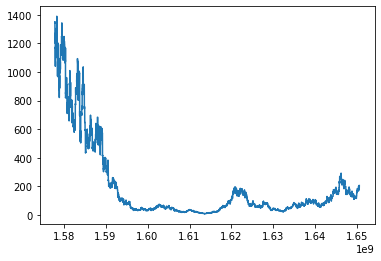

In [128]:
plt.plot(df1['open'])

In [129]:
for i in range(len(dfs)):
    for j in range(len(dfs[i])):
        name = names[i]
        start = dfs[i]['ts_start'].iloc[j]
        end = dfs[i]['ts_end'].iloc[j]
        temp = df1.loc[start:end,['open','close','low','high']]
#         fig = go.Figure(data=go.Ohlc(
#                         open=temp['open'],
#                         high=temp['high'],
#                         low=temp['low'],close=temp['close']))
#         fig = plt.plot(temp['open'])
#         plt.show(fig)
        plt.plot(temp['open'])
        o = plt.savefig("/Users/niharpatel/Desktop/Untitled Folder/Data/"+name+"/"+str(j+1101)+name+".jpeg")
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [130]:
for i in range(len(dfs)):
    for j in range(len(dfs[i])):
        name = names[i]
        start = dfs[i]['ts_start'].iloc[j]
        end = dfs[i]['ts_end'].iloc[j]
        temp = df1.loc[start:end,['open','close','low','high']]
#         fig = go.Figure(data=go.Ohlc(
#                         open=temp['open'],
#                         high=temp['high'],
#                         low=temp['low'],close=temp['close']))
#         fig = plt.plot(temp['open'])
#         plt.show(fig)
        plt.plot(temp['close'])
        o = plt.savefig("/Users/niharpatel/Desktop/Untitled Folder/Data/"+name+"/"+str(j+2102)+name+".jpeg")
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [131]:
for i in range(len(dfs)):
    for j in range(len(dfs[i])):
        name = names[i]
        start = dfs[i]['ts_start'].iloc[j]
        end = dfs[i]['ts_end'].iloc[j]
        temp = df1.loc[start:end,['open','close','low','high']]
#         fig = go.Figure(data=go.Ohlc(
#                         open=temp['open'],
#                         high=temp['high'],
#                         low=temp['low'],close=temp['close']))
#         fig = plt.plot(temp['open'])
#         plt.show(fig)
        plt.plot(temp['high'])
        o = plt.savefig("/Users/niharpatel/Desktop/Untitled Folder/Data/"+name+"/"+str(j+3101)+name+".jpeg")
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [132]:
for i in range(len(dfs)):
    for j in range(len(dfs[i])):
        name = names[i]
        start = dfs[i]['ts_start'].iloc[j]
        end = dfs[i]['ts_end'].iloc[j]
        temp = df1.loc[start:end,['open','close','low','high']]
#         fig = go.Figure(data=go.Ohlc(
#                         open=temp['open'],
#                         high=temp['high'],
#                         low=temp['low'],close=temp['close']))
#         fig = plt.plot(temp['open'])
#         plt.show(fig)
        plt.plot(temp['low'])
        o = plt.savefig("/Users/niharpatel/Desktop/Untitled Folder/Data/"+name+"/"+str(j+4101)+name+".jpeg")
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [135]:
pip install opencv

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv
Note: you may need to restart the kernel to use updated packages.


In [134]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [133]:
 
img = cv2.imread('test.jpg')
print(img.shape) # Print image shape
cv2.imshow("original", img)
 
# Cropping an image
cropped_image = img[80:280, 150:330]
 
# Display cropped image
cv2.imshow("cropped", cropped_image)
 

NameError: name 'cv2' is not defined